In [6]:
#!git clone https://github.com/orangecode12/Data_for_capstone1

Cloning into 'Data_for_capstone1'...
remote: Enumerating objects: 7648, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 7648 (delta 0), reused 3 (delta 0), pack-reused 7645
Receiving objects: 100% (7648/7648), 180.97 MiB | 63.27 MiB/s, done.


Training custom CNN

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img


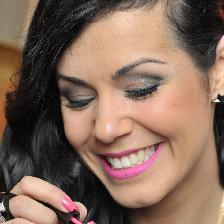

In [4]:
path = './Data_for_capstone1/data/train/Happy'
name = '002d58c033395fe86d8ec7959eba4233043c2b1ba004930686680808.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
img = load_img(fullname, target_size=(150, 150))
x = np.array(img)
x.shape

(150, 150, 3)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
# Create a Sequential model
model = Sequential()
input_shape = (224,224, 3)

# Add a Conv2D layer with 32 filters, a (3, 3) kernel, and 'relu' activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Add a MaxPooling2D layer with a pooling size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Flatten layer to convert the result into vectors
model.add(Flatten())

# Add a Dense layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

# Add the output Dense layer with 1 neuron and 'sigmoid' activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Create an SGD optimizer with the specified parameters
optimizer = SGD(learning_rate=0.002, momentum=0.8)

# Compile the model with the optimizer and a suitable loss function (e.g., binary cross-entropy for binary classification)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 394272)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                25233472  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,234,433
Trainable params: 25,234,433
Non-trainable params: 0
__________________________________________

In [3]:
train_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_ds = train_gen.flow_from_directory(
    './Data_for_capstone1/data/train',
    class_mode='binary',
    target_size=(224,224),
    batch_size=20,
    shuffle=True
)

Found 5770 images belonging to 2 classes.


In [8]:
train_ds

In [5]:
test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory(
    './Data_for_capstone1/data/test',
    class_mode='binary',
    target_size=(224,224),
    batch_size=20,
    shuffle=True
)

Found 1905 images belonging to 2 classes.


In [24]:
history = model.fit(train_ds, epochs=15, validation_data=test_ds)

Epoch 1/15
289/289 [==============================] - 15s 50ms/step - loss: 0.6850 - accuracy: 0.5602 - val_loss: 0.6593 - val_accuracy: 0.6105
Epoch 2/15
289/289 [==============================] - 14s 50ms/step - loss: 0.6042 - accuracy: 0.6758 - val_loss: 0.5810 - val_accuracy: 0.7039
Epoch 3/15
289/289 [==============================] - 14s 50ms/step - loss: 0.5190 - accuracy: 0.7553 - val_loss: 0.5548 - val_accuracy: 0.7150
Epoch 4/15
289/289 [==============================] - 14s 49ms/step - loss: 0.4958 - accuracy: 0.7721 - val_loss: 0.4883 - val_accuracy: 0.7701
Epoch 5/15
289/289 [==============================] - 14s 49ms/step - loss: 0.4575 - accuracy: 0.7853 - val_loss: 0.4712 - val_accuracy: 0.7911
Epoch 6/15
289/289 [==============================] - 14s 50ms/step - loss: 0.4459 - accuracy: 0.7938 - val_loss: 0.4536 - val_accuracy: 0.7937
Epoch 7/15
289/289 [==============================] - 14s 50ms/step - loss: 0.4250 - accuracy: 0.8063 - val_loss: 0.4744 - val_accuracy:

In [26]:
scores = {}
scores[0.002] = history.history

In [27]:
def create_model(lr):
    model = Sequential()
    input_shape = (224,224, 3)

    # Add a Conv2D layer with 32 filters, a (3, 3) kernel, and 'relu' activation
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

    # Add a MaxPooling2D layer with a pooling size of (2, 2)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add a Flatten layer to convert the result into vectors
    model.add(Flatten())

    # Add a Dense layer with 64 neurons and 'relu' activation
    model.add(Dense(64, activation='relu'))

    # Add the output Dense layer with 1 neuron and 'sigmoid' activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Create an SGD optimizer with the specified parameters
    optimizer = SGD(learning_rate=lr, momentum=0.8)

    # Compile the model with the optimizer and a suitable loss function (e.g., binary cross-entropy for binary classification)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [29]:
for lr in [0.0001, 0.0005, 0.005, 0.01, 0.1]:
    model = create_model(lr)
    history = model.fit(train_ds, epochs=15, validation_data=test_ds)
    scores[lr] = history.history
    

Epoch 1/15
289/289 [==============================] - 14s 48ms/step - loss: 0.6733 - accuracy: 0.5805 - val_loss: 0.6581 - val_accuracy: 0.6247
Epoch 2/15
289/289 [==============================] - 13s 47ms/step - loss: 0.6335 - accuracy: 0.6496 - val_loss: 0.6336 - val_accuracy: 0.6451
Epoch 3/15
289/289 [==============================] - 13s 46ms/step - loss: 0.6012 - accuracy: 0.6926 - val_loss: 0.6155 - val_accuracy: 0.6478
Epoch 4/15
289/289 [==============================] - 14s 47ms/step - loss: 0.5728 - accuracy: 0.7189 - val_loss: 0.5727 - val_accuracy: 0.7312
Epoch 5/15
289/289 [==============================] - 13s 46ms/step - loss: 0.5470 - accuracy: 0.7392 - val_loss: 0.5522 - val_accuracy: 0.7407
Epoch 6/15
289/289 [==============================] - 14s 48ms/step - loss: 0.5284 - accuracy: 0.7477 - val_loss: 0.5322 - val_accuracy: 0.7491
Epoch 7/15
289/289 [==============================] - 14s 48ms/step - loss: 0.5147 - accuracy: 0.7545 - val_loss: 0.5149 - val_accuracy:

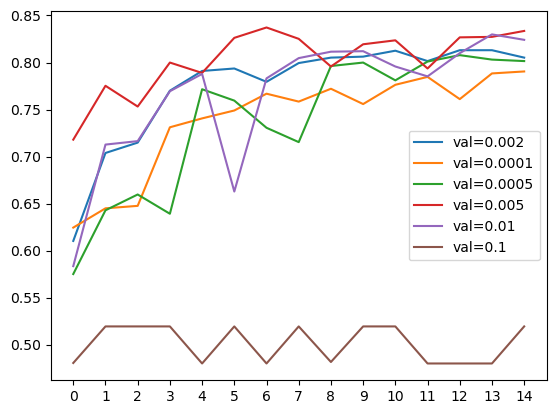

In [35]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(15))
plt.legend()

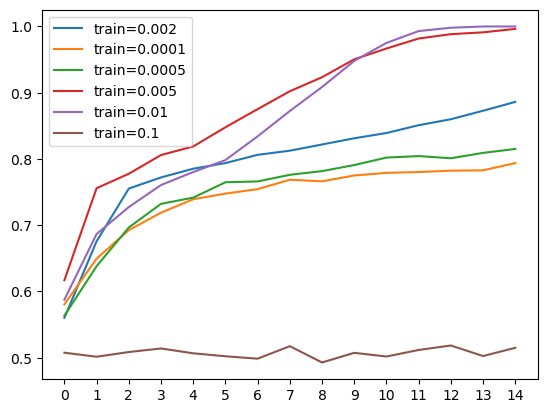

In [36]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(15))
plt.legend()

In [32]:
learning_rate = 0.005

In [37]:
model.save_weights('model_v1.h5', save_format='h5')

In [38]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'model_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [40]:
model = create_model(learning_rate)

history = model.fit(
    train_ds,
    epochs=15,
    validation_data=test_ds,
    callbacks=[chechpoint]
)

Epoch 1/15
289/289 [==============================] - 14s 48ms/step - loss: 0.6861 - accuracy: 0.5950 - val_loss: 0.5897 - val_accuracy: 0.6829
Epoch 2/15
289/289 [==============================] - 14s 47ms/step - loss: 0.5545 - accuracy: 0.7172 - val_loss: 0.6522 - val_accuracy: 0.6583
Epoch 3/15
289/289 [==============================] - 14s 48ms/step - loss: 0.4813 - accuracy: 0.7761 - val_loss: 0.4785 - val_accuracy: 0.7832
Epoch 4/15
289/289 [==============================] - 14s 48ms/step - loss: 0.4266 - accuracy: 0.8047 - val_loss: 0.4533 - val_accuracy: 0.8005
Epoch 5/15
289/289 [==============================] - 13s 46ms/step - loss: 0.3782 - accuracy: 0.8395 - val_loss: 0.4403 - val_accuracy: 0.7895
Epoch 6/15
289/289 [==============================] - 14s 47ms/step - loss: 0.3738 - accuracy: 0.8371 - val_loss: 0.4581 - val_accuracy: 0.7879
Epoch 7/15
289/289 [==============================] - 13s 46ms/step - loss: 0.3082 - accuracy: 0.8699 - val_loss: 0.4868 - val_accuracy:

In [41]:
def create_model_layers(layers):
    model = Sequential()
    input_shape = (224,224, 3)

    # Add a Conv2D layer with 32 filters, a (3, 3) kernel, and 'relu' activation
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

    # Add a MaxPooling2D layer with a pooling size of (2, 2)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add a Flatten layer to convert the result into vectors
    model.add(Flatten())

    # Add a Dense layer with 64 neurons and 'relu' activation
    model.add(Dense(layers, activation='relu'))

    # Add the output Dense layer with 1 neuron and 'sigmoid' activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Create an SGD optimizer with the specified parameters
    optimizer = SGD(learning_rate=learning_rate, momentum=0.8)

    # Compile the model with the optimizer and a suitable loss function (e.g., binary cross-entropy for binary classification)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [42]:
scores = {}

for layers in [32, 64, 128, 256]:
    model = create_model_layers(layers)
    history = model.fit(train_ds, epochs=10, validation_data=test_ds)
    scores[layers] = history.history

Epoch 1/10
289/289 [==============================] - 15s 49ms/step - loss: 0.6283 - accuracy: 0.6567 - val_loss: 0.6637 - val_accuracy: 0.6614
Epoch 2/10
289/289 [==============================] - 14s 47ms/step - loss: 0.5123 - accuracy: 0.7638 - val_loss: 0.5245 - val_accuracy: 0.7501
Epoch 3/10
289/289 [==============================] - 14s 48ms/step - loss: 0.4618 - accuracy: 0.7855 - val_loss: 0.5132 - val_accuracy: 0.7559
Epoch 4/10
289/289 [==============================] - 13s 46ms/step - loss: 0.4325 - accuracy: 0.8049 - val_loss: 0.4477 - val_accuracy: 0.7927
Epoch 5/10
289/289 [==============================] - 13s 46ms/step - loss: 0.3880 - accuracy: 0.8245 - val_loss: 0.4158 - val_accuracy: 0.8173
Epoch 6/10
289/289 [==============================] - 13s 46ms/step - loss: 0.3409 - accuracy: 0.8468 - val_loss: 0.4358 - val_accuracy: 0.8089
Epoch 7/10
289/289 [==============================] - 14s 47ms/step - loss: 0.3159 - accuracy: 0.8667 - val_loss: 0.4097 - val_accuracy:

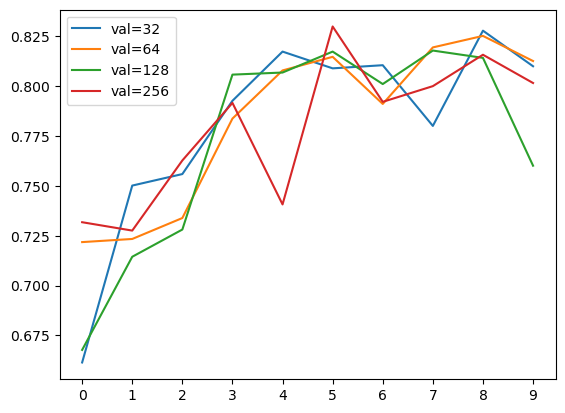

In [44]:
for layers, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % layers))

plt.xticks(np.arange(10))
plt.legend()

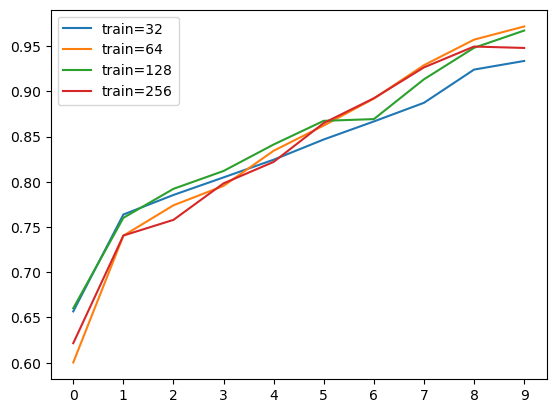

In [45]:
for layers, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % layers))
    #plt.plot(hist['val_accuracy'], label=('val=%s' % layers))

plt.xticks(np.arange(10))
plt.legend()

In [7]:
layers = 64

In [6]:
from keras.layers import Dropout

def create_model_drop(dropout):
    model = Sequential()
    input_shape = (224,224, 3)

    # Add a Conv2D layer with 32 filters, a (3, 3) kernel, and 'relu' activation
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

    # Add a MaxPooling2D layer with a pooling size of (2, 2)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add a Flatten layer to convert the result into vectors
    model.add(Flatten())

    # Add a Dense layer with 64 neurons and 'relu' activation
    model.add(Dense(layers, activation='relu'))
    
    # drop = keras.layers.Dropout(droprate)(inner)
    model.add(Dropout(dropout))
    
    # Add the output Dense layer with 1 neuron and 'sigmoid' activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Create an SGD optimizer with the specified parameters
    optimizer = SGD(learning_rate=learning_rate, momentum=0.8)

    # Compile the model with the optimizer and a suitable loss function (e.g., binary cross-entropy for binary classification)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [52]:
scores = {}

for drop in [0.0, 0.2, 0.5, 0.8]:
    model = create_model_layers(layers)
    history = model.fit(train_ds, epochs=15, validation_data=test_ds)
    scores[drop] = history.history

Epoch 1/15
289/289 [==============================] - 15s 50ms/step - loss: 0.6326 - accuracy: 0.6557 - val_loss: 0.5355 - val_accuracy: 0.7454
Epoch 2/15
289/289 [==============================] - 14s 49ms/step - loss: 0.5239 - accuracy: 0.7474 - val_loss: 0.5161 - val_accuracy: 0.7585
Epoch 3/15
289/289 [==============================] - 14s 49ms/step - loss: 0.4801 - accuracy: 0.7713 - val_loss: 0.4823 - val_accuracy: 0.7769
Epoch 4/15
289/289 [==============================] - 14s 49ms/step - loss: 0.4196 - accuracy: 0.8090 - val_loss: 0.4181 - val_accuracy: 0.8142
Epoch 5/15
289/289 [==============================] - 14s 49ms/step - loss: 0.3705 - accuracy: 0.8388 - val_loss: 0.4179 - val_accuracy: 0.8220
Epoch 6/15
289/289 [==============================] - 14s 49ms/step - loss: 0.3424 - accuracy: 0.8512 - val_loss: 0.4450 - val_accuracy: 0.7885
Epoch 7/15
289/289 [==============================] - 14s 48ms/step - loss: 0.2748 - accuracy: 0.8894 - val_loss: 0.4659 - val_accuracy:

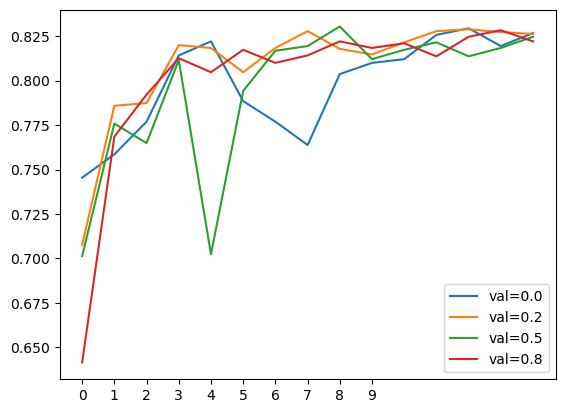

In [53]:
for dropout, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % dropout))

plt.xticks(np.arange(10))
plt.legend()

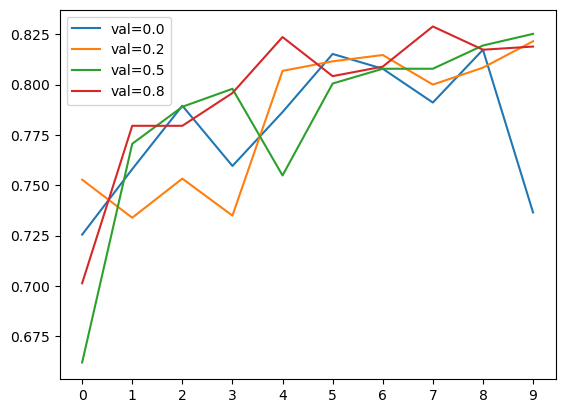

In [51]:
for dropout, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % dropout))

plt.xticks(np.arange(10))
plt.legend()

In [54]:
dropout = 0.2

In [7]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'model_v3_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


In [9]:
learning_rate = 0.005
layers = 64
dropout = 0.2


model = Sequential()
input_shape = (224,224, 3)

# Add a Conv2D layer with 32 filters, a (3, 3) kernel, and 'relu' activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Add a MaxPooling2D layer with a pooling size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Flatten layer to convert the result into vectors
model.add(Flatten())

# Add a Dense layer with 64 neurons and 'relu' activation
model.add(Dense(layers, activation='relu'))

# drop = keras.layers.Dropout(droprate)(inner)
model.add(Dropout(dropout))

# Add the output Dense layer with 1 neuron and 'sigmoid' activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Create an SGD optimizer with the specified parameters
optimizer = SGD(learning_rate=learning_rate, momentum=0.8)

# Compile the model with the optimizer and a suitable loss function (e.g., binary cross-entropy for binary classification)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=[checkpoint])

Epoch 1/50


2023-12-17 08:08:26.529944: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-17 08:08:27.158203: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 08:08:27.158711: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 08:08:27.158748: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-17 08:08:27.159506: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 08:08:27.159586: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


289/289 [==============================] - 21s 65ms/step - loss: 0.6442 - accuracy: 0.6503 - val_loss: 0.5810 - val_accuracy: 0.7171
Epoch 2/50
289/289 [==============================] - 14s 49ms/step - loss: 0.5319 - accuracy: 0.7401 - val_loss: 0.5315 - val_accuracy: 0.7459
Epoch 3/50
289/289 [==============================] - 14s 49ms/step - loss: 0.4834 - accuracy: 0.7685 - val_loss: 0.4651 - val_accuracy: 0.7848
Epoch 4/50
289/289 [==============================] - 15s 50ms/step - loss: 0.4401 - accuracy: 0.7943 - val_loss: 0.4566 - val_accuracy: 0.7995
Epoch 5/50
289/289 [==============================] - 14s 50ms/step - loss: 0.4145 - accuracy: 0.8194 - val_loss: 0.4277 - val_accuracy: 0.8068
Epoch 6/50
289/289 [==============================] - 14s 48ms/step - loss: 0.3621 - accuracy: 0.8392 - val_loss: 0.4191 - val_accuracy: 0.8063
Epoch 7/50
289/289 [==============================] - 14s 50ms/step - loss: 0.3208 - accuracy: 0.8593 - val_loss: 0.5024 - val_accuracy: 0.7748
Epo

In [11]:
learning_rate = 0.005
layers = 64
dropout = 0.5

checkpoint = keras.callbacks.ModelCheckpoint(
    'model_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


model = Sequential()
input_shape = (224,224, 3)

# Add a Conv2D layer with 32 filters, a (3, 3) kernel, and 'relu' activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Add a MaxPooling2D layer with a pooling size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Flatten layer to convert the result into vectors
model.add(Flatten())

# Add a Dense layer with 64 neurons and 'relu' activation
model.add(Dense(layers, activation='relu'))

# drop = keras.layers.Dropout(droprate)(inner)
model.add(Dropout(dropout))

# Add the output Dense layer with 1 neuron and 'sigmoid' activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Create an SGD optimizer with the specified parameters
optimizer = SGD(learning_rate=learning_rate, momentum=0.8)

# Compile the model with the optimizer and a suitable loss function (e.g., binary cross-entropy for binary classification)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=[checkpoint])

Epoch 1/50
289/289 [==============================] - 15s 50ms/step - loss: 0.6771 - accuracy: 0.5971 - val_loss: 0.6523 - val_accuracy: 0.6157
Epoch 2/50
289/289 [==============================] - 14s 49ms/step - loss: 0.6164 - accuracy: 0.6702 - val_loss: 0.5949 - val_accuracy: 0.6898
Epoch 3/50
289/289 [==============================] - 14s 50ms/step - loss: 0.5695 - accuracy: 0.7044 - val_loss: 0.5535 - val_accuracy: 0.7239
Epoch 4/50
289/289 [==============================] - 14s 49ms/step - loss: 0.5343 - accuracy: 0.7399 - val_loss: 0.5026 - val_accuracy: 0.7564
Epoch 5/50
289/289 [==============================] - 14s 47ms/step - loss: 0.4908 - accuracy: 0.7564 - val_loss: 0.4959 - val_accuracy: 0.7585
Epoch 6/50
289/289 [==============================] - 14s 49ms/step - loss: 0.4589 - accuracy: 0.7824 - val_loss: 0.4460 - val_accuracy: 0.8031
Epoch 7/50
289/289 [==============================] - 14s 49ms/step - loss: 0.4025 - accuracy: 0.8108 - val_loss: 0.4255 - val_accuracy:

Choose threshold

In [10]:
import os
from PIL import Image
import numpy as np
from keras.preprocessing import image

def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

def preprocess_input(x):
    x /= 255
    return x

# Replace 'path/to/your/images/directory' with the actual path to your image directory
happy_directory = 'Data_for_capstone1/data/test/Happy'
target_size = (224, 224)  # Change this to the desired target size

# List all image files in the directory
image_files = [f for f in os.listdir(happy_directory)]

# Initialize an empty list to store processed images
X_prep = []

# Loop through each image file in the directory
for image_file in image_files:
    img_path = os.path.join(happy_directory, image_file)
    img = Image.open(img_path)

    # Prepare the image
    img = prepare_image(img, target_size)

    # Convert image to a numpy array and preprocess it
    x = image.img_to_array(img)
    x = preprocess_input(x)

    # Append the processed image to the list
    X_prep.append(x)



# Convert the list of images to a numpy array
X_prep = np.array(X_prep)



In [8]:
from keras.models import load_model
model = load_model('model_v3_50_0.843.h5')

In [7]:
# Make predictions using the model (replace 'model' with your actual model)
pred = model.predict(X_prep)
pred = pred.round(3)
pred
# Now 'pred' contains predictions for all images in the directory

29/29 [==============================] - 7s 244ms/step


array([[0.   ],
       [0.004],
       [1.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.997],
       [0.294],
       [0.   ],
       [0.   ],
       [0.003],
       [0.   ],
       [0.001],
       [0.   ],
       [0.878],
       [0.667],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.001],
       [0.014],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.993],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.04 ],
       [0.601],
       [0.   ],
       [0.   ],
       [0.999],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.285],
       [0.088],
       [0.022],
       [0.001],
       [0.   ],
       [

In [9]:
pred_happy = pred

In [10]:
# Replace 'path/to/your/images/directory' with the actual path to your image directory
sad_directory = 'Data_for_capstone1/data/test/Sad'
target_size = (224, 224)  # Change this to the desired target size

# List all image files in the directory
image_files = [f for f in os.listdir(sad_directory)]

# Initialize an empty list to store processed images
X_prep = []

# Loop through each image file in the directory
for image_file in image_files:
    img_path = os.path.join(sad_directory, image_file)
    img = Image.open(img_path)

    # Prepare the image
    img = prepare_image(img, target_size)

    # Convert image to a numpy array and preprocess it
    x = image.img_to_array(img)
    x = preprocess_input(x)

    # Append the processed image to the list
    X_prep.append(x)



# Convert the list of images to a numpy array
X_prep = np.array(X_prep)

# Make predictions using the model (replace 'model' with your actual model)
pred = model.predict(X_prep)
pred = pred.round(3)

pred_sad = pred

31/31 [==============================] - 8s 241ms/step


In [11]:
print(pred_happy.shape)
print(pred_sad.shape)

(915, 1)
(990, 1)


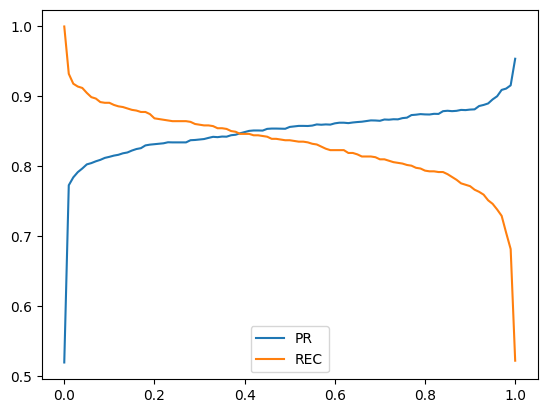

In [13]:
thresholds = np.linspace(0, 1, 101)
scores = []

# 0 (negative) - Happy, 1 (positive) - Sad
for t in thresholds:
  tn = np.sum(pred_happy < t)
  fn = np.sum(pred_sad < t)
  fp = np.sum(pred_happy >= t)
  tp = np.sum(pred_sad >= t)

  scores.append((t, tp, fp, fn, tn))


columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores.threshold, df_scores['precision'], label='PR')
plt.plot(df_scores.threshold, df_scores['recall'], label='REC')
plt.legend()

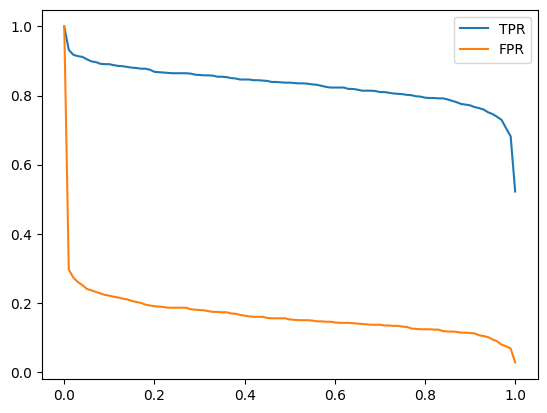

In [14]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [15]:
df_scores[(df_scores.threshold >= 0.3) & (df_scores.threshold <= 0.5)]

,threshold,tp,fp,fn,tn,precision,recall,tpr,fpr
30,0.30,851,164,139,751,0.838424,0.859596,0.859596,0.179235
31,0.31,850,163,140,752,0.839092,0.858586,0.858586,0.178142
32,0.32,850,161,140,754,0.840752,0.858586,0.858586,0.175956
33,0.33,849,159,141,756,0.842262,0.857576,0.857576,0.173770
34,0.34,846,159,144,756,0.841791,0.854545,0.854545,0.173770
35,0.35,846,158,144,757,0.842629,0.854545,0.854545,0.172678
36,0.36,845,158,145,757,0.842473,0.853535,0.853535,0.172678
37,0.37,842,155,148,760,0.844534,0.850505,0.850505,0.169399
38,0.38,841,154,149,761,0.845226,0.849495,0.849495,0.168306
39,0.39,838,151,152,764,0.847321,0.846465,0.846465,0.165027


In [1]:
threshold = 0.38

In [30]:
target_size = (224, 224)  # Change this to the desired target size

# Initialize an empty list to store processed images
X_prep = []

img = Image.open('me.jpg')

# Prepare the image
img = prepare_image(img, target_size)

# Convert image to a numpy array and preprocess it
x = image.img_to_array(img)
x = preprocess_input(x)

X_prep.append(x)

# Convert the list of images to a numpy array
X_prep = np.array(X_prep)

# Make predictions using the model (replace 'model' with your actual model)
pred = model.predict(X_prep)
pred = pred.round(3)

pred

1/1 [==============================] - 0s 127ms/step


array([[0.]], dtype=float32)